# Assignment 5: Segmentation
The objective of this assignment is to give you experience with segmentation.

In [285]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from plotnine import *

In [232]:
customer_survey = pd.read_csv("/data/Assignment-5/CustomerSurvey.tsv", sep ='\t', header=1)

In [233]:
# pull out the column descriptions
descriptions = customer_survey.loc[0,]
descriptions

obs id                                                Observation Identifier
num eat out                Actual number of times per week that responden...
Jaes most freq             Question asked for the name of the respondent'...
sec most freq              Question asked for the name of the respondent'...
ImpConv                    How important is convenience to you in your se...
Imp Menu Variety           How important is menu variety to you in your s...
Imp Value                  How important is value to you in your selectio...
Imp healthy options        How important are healthy options to you in yo...
Imp taste                  How important is taste of the food to you in y...
Imp friendly staff         How important is the friendliness of the staff...
Imp ambiance               How important is the ambiance of the restauran...
num jaes last month        Actual number of times per month that responde...
Compare covenience         How well does Jae's compare to competitors on ...

In [234]:
# remove descriptions for clean data
df = customer_survey.drop(0)
#df.dtypes

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

df = df[df.applymap(isnumber)]
df = df.apply(pd.to_numeric)
df = df.dropna()
df

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare taste,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,5.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,6.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,4.0,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


In [235]:
# What is the variance of each column?  This might be useful in determining which columns to consider in your analysis; e.g., threshold to only use columns above a certain variance.
df.var()

obs id                     3617.714286
num eat out                   2.016436
Jaes most freq                0.234437
sec most freq                 0.193065
ImpConv                       1.548632
Imp Menu Variety              1.106777
Imp Value                     1.447371
Imp healthy options           2.980975
Imp taste                     2.867500
Imp friendly staff            1.616008
Imp ambiance                  1.482157
num jaes last month           4.732748
Compare covenience            2.154396
Compare menu variety          1.364742
Compare value                 1.496341
Compare healthy options       3.014747
Compare taste                 3.269391
Compare friendly staff        2.619779
Compare ambiance              1.494428
gender                        0.223404
age                           0.483789
income                        0.991613
hhld type                     0.484014
kids under 5                  0.426601
kids 5-12                     0.236801
kids over 12             

In [236]:
# This is an example of one way to pull out the columns you're interesed in.  (There are other good ways too, but this is easy to read.)
X = df.loc[:,['Imp healthy options','Imp taste','num jaes last month','Compare healthy options','Compare taste','Compare friendly staff']]
X

,Imp healthy options,Imp taste,num jaes last month,Compare healthy options,Compare taste,Compare friendly staff
1,1.0,5.0,4.0,1.0,5.0,2.0
2,2.0,6.0,5.0,2.0,6.0,2.0
3,6.0,3.0,5.0,6.0,5.0,5.0
4,5.0,4.0,7.0,5.0,4.0,6.0
5,2.0,2.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...
197,1.0,1.0,1.0,1.0,1.0,1.0
198,1.0,1.0,1.0,1.0,1.0,1.0
199,2.0,2.0,1.0,2.0,2.0,2.0
200,2.0,3.0,1.0,2.0,3.0,3.0


### Now, using the Session 6 activity as as guide, segment the customers and answer all the questions in the write-up requirements.

# _kmeans_

In [237]:
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

In [238]:
import rpy2.ipython
%reload_ext rpy2.ipython

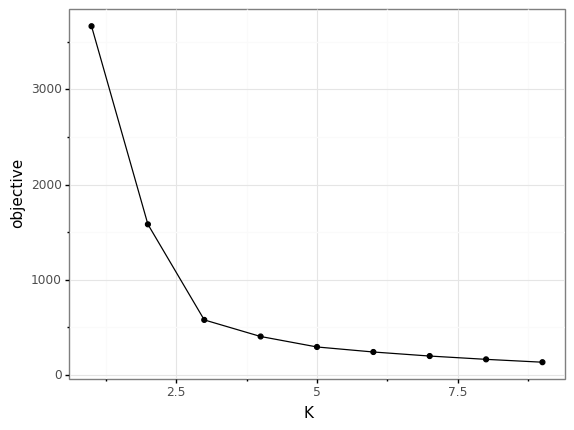

<ggplot: (8742896407146)>

In [239]:
# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

In [240]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(X)

In [241]:
kmeans.cluster_centers_

array([[1.64814815, 1.68518519, 1.05555556, 1.64814815, 1.68518519,
        2.10185185],
       [5.3902439 , 3.53658537, 5.73170732, 5.48780488, 4.41463415,
        5.48780488],
       [1.525     , 5.525     , 4.525     , 1.5       , 5.5       ,
        2.        ]])

In [242]:
# append the clusters to the data
clustered_data = df.join(pd.DataFrame({'cluster': kmeans.labels_}))
clustered_data

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,NaN
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,NaN
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN


# _Demographic_

In [248]:
pd.crosstab(clustered_data.cluster, clustered_data.income)

income,1.0,2.0,3.0,4.0
cluster,,,,
0.0,34,34,25,12
1.0,20,9,7,1
2.0,4,10,14,6


In [249]:
pd.crosstab(clustered_data['hhld type'], clustered_data.cluster)

cluster,0.0,1.0,2.0
hhld type,,,
1.0,20,14,8
2.0,60,17,15
3.0,25,6,11


In [250]:
pd.crosstab(clustered_data.cluster, [clustered_data.age, clustered_data.gender])

age     1.0     2.0     3.0     4.0    
gender  1.0 2.0 1.0 2.0 1.0 2.0 1.0 2.0
cluster                                
0.0       6   2  18  27  39   7   4   2
1.0       2   1  11  10   8   4   1   0
2.0       1   1   8   3  17   2   1   1

In [212]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])
        
sorted_attr(0, kmeans.cluster_centers_, X.columns)
# Does this give the full picture?  What's missing?

*** Sorted attributes for 0 ***
Compare friendly staff 2.101851851851852
Compare taste 1.6851851851851856
Imp taste 1.6851851851851853
Imp healthy options 1.6481481481481484
Compare healthy options 1.6481481481481466
num jaes last month 1.0555555555555514


In [213]:
sorted_attr(1, kmeans.cluster_centers_, X.columns)

*** Sorted attributes for 1 ***
num jaes last month 5.731707317073168
Compare friendly staff 5.487804878048782
Compare healthy options 5.487804878048777
Imp healthy options 5.390243902439026
Compare taste 4.414634146341465
Imp taste 3.536585365853659


In [214]:
sorted_attr(2, kmeans.cluster_centers_, X.columns)

*** Sorted attributes for 2 ***
Imp taste 5.525
Compare taste 5.499999999999999
num jaes last month 4.5249999999999995
Compare friendly staff 1.9999999999999991
Imp healthy options 1.525
Compare healthy options 1.5000000000000002


# _Factor Analysis_

In [215]:
# Now let's try something else...running factor analysis on our attributes
transformer = FactorAnalysis(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(X)
transformer.components_

array([[ 1.69862516,  0.58607892,  1.52804139,  1.68712284,  1.02865674,
         1.3238926 ],
       [-0.26933605,  1.55982282,  1.12304061, -0.27030998,  1.44886868,
        -0.12237565],
       [-0.01177396,  0.2062528 ,  0.48639076,  0.14995346, -0.24351439,
         0.42855153]])

In [216]:
# What's important to each factor?
sorted_attr(0, transformer.components_, X.columns)
sorted_attr(1, transformer.components_, X.columns)
sorted_attr(2, transformer.components_, X.columns)

*** Sorted attributes for 0 ***
Imp healthy options 1.6986251558563787
Compare healthy options 1.6871228430189762
num jaes last month 1.5280413915685649
Compare friendly staff 1.3238926035118235
Compare taste 1.0286567445136041
Imp taste 0.5860789243618327
*** Sorted attributes for 1 ***
Imp taste 1.5598228188492613
Compare taste 1.448868682054224
num jaes last month 1.1230406101507329
Compare friendly staff -0.12237564703236437
Imp healthy options -0.2693360524361909
Compare healthy options -0.2703099831513492
*** Sorted attributes for 2 ***
num jaes last month 0.4863907590937396
Compare friendly staff 0.42855153217010994
Imp taste 0.2062528042633312
Compare healthy options 0.14995345917370556
Imp healthy options -0.011773963305296009
Compare taste -0.24351439323391527


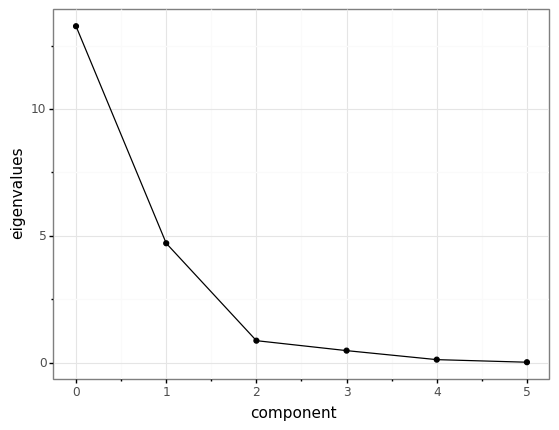

<ggplot: (8742896417021)>

In [217]:
# scree plot
from sklearn.decomposition import PCA
pca = PCA().fit(X)
scree_data = pd.DataFrame({'eigenvalues': pca.explained_variance_, 
                           'component': range(len(pca.explained_variance_))})
# plot the results; what K is best?
(ggplot(scree_data)                      # defining what data to use
 + aes(x='component', y='eigenvalues')   # map variables to attributes
 + geom_point() + geom_line()            # defining the type of geometric objects to use
 + theme_bw()                            # other aestheic attributes
)

In [218]:
transformer = FactorAnalysis(n_components=3, random_state =0)
X_transformed = transformer.fit_transform(X)
transformer.components_
sorted_attr(0, transformer.components_, X.columns)
sorted_attr(1, transformer.components_, X.columns)
sorted_attr(2, transformer.components_, X.columns)

*** Sorted attributes for 0 ***
Imp healthy options 1.6986251558563787
Compare healthy options 1.6871228430189762
num jaes last month 1.5280413915685649
Compare friendly staff 1.3238926035118235
Compare taste 1.0286567445136041
Imp taste 0.5860789243618327
*** Sorted attributes for 1 ***
Imp taste 1.5598228188492613
Compare taste 1.448868682054224
num jaes last month 1.1230406101507329
Compare friendly staff -0.12237564703236437
Imp healthy options -0.2693360524361909
Compare healthy options -0.2703099831513492
*** Sorted attributes for 2 ***
num jaes last month 0.4863907590937396
Compare friendly staff 0.42855153217010994
Imp taste 0.2062528042633312
Compare healthy options 0.14995345917370556
Imp healthy options -0.011773963305296009
Compare taste -0.24351439323391527


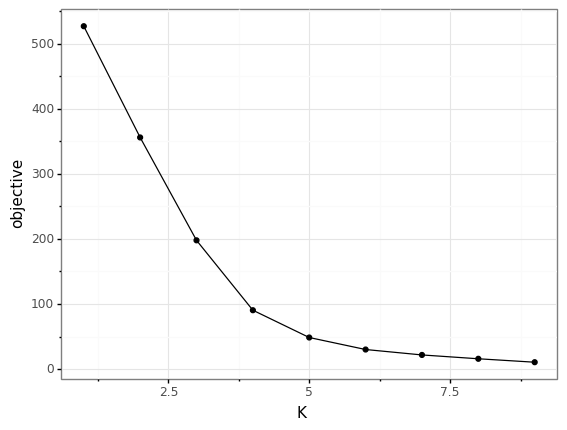

<ggplot: (8742896449526)>

In [219]:
# Let's cluster based on the FA scores

# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

## _Identify best number of clusters in this context and fit k-means again._

In [220]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_transformed)

# Add the clusters to the data frame
clustered_data = df.join(pd.DataFrame({'cluster':kmeans.labels_}))

In [221]:
clustered_data

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,NaN
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,NaN
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN


In [222]:
kmeans.cluster_centers_
# X.columns

array([[ 1.6816056 , -0.27212134,  0.29249014],
       [-0.26064999,  1.77726828, -0.19451174],
       [-0.56547911, -0.57961229, -0.04065665]])

In [223]:
sorted_attr(0, transformer.components_, X.columns)

*** Sorted attributes for 0 ***
Imp healthy options 1.6986251558563787
Compare healthy options 1.6871228430189762
num jaes last month 1.5280413915685649
Compare friendly staff 1.3238926035118235
Compare taste 1.0286567445136041
Imp taste 0.5860789243618327


In [224]:
sorted_attr(1, transformer.components_, X.columns)

*** Sorted attributes for 1 ***
Imp taste 1.5598228188492613
Compare taste 1.448868682054224
num jaes last month 1.1230406101507329
Compare friendly staff -0.12237564703236437
Imp healthy options -0.2693360524361909
Compare healthy options -0.2703099831513492


In [225]:
sorted_attr(2, transformer.components_, X.columns)

*** Sorted attributes for 2 ***
num jaes last month 0.4863907590937396
Compare friendly staff 0.42855153217010994
Imp taste 0.2062528042633312
Compare healthy options 0.14995345917370556
Imp healthy options -0.011773963305296009
Compare taste -0.24351439323391527


# _Question7_

### At some point, you will also need to use the noncustomer survey data...
Note: the simplest approach in this phase of your analysis will be to use crosstabs on the noncustomer survey data.

In [394]:
noncustomer_survey = pd.read_csv("/data/Assignment-5/NoncustomerSurvey.tsv", sep ='\t', header=1)

In [395]:
# pull out the column descriptions
noncustomer_descriptions = noncustomer_survey.loc[0,]
noncustomer_descriptions

obs                                                          Observation Identifier
#times/wk eat lunch/dinner out    Actual number of times per week that responden...
FCR most freq                     Question asked for the name of the respondent'...
FCR sec most freq                 Question asked for the name of the respondent'...
Imp convenient                    How important is convenience to you in your se...
Imp menu variety                  How important is menu variety to you in your s...
Imp value                         How important is value to you in your selectio...
Imp healty options                How important are healthy options to you in yo...
Imp taste                         How important is taste of the food to you in y...
Imp friendly staff                How important is the friendliness of the staff...
Imp ambience                      How important is the ambiance of the restauran...
gender                                                   Gender:  1= Female,

In [396]:
# remove descriptions for clean data
noncustomer_df = noncustomer_survey.drop(0)

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

noncustomer_df = noncustomer_df[noncustomer_df.applymap(isnumber)]
noncustomer_df = noncustomer_df.apply(pd.to_numeric)
noncustomer_df

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,250,1.0,NaN,NaN,1,3.0,1,5.0,1,5.0,3,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2
177,255,2.0,NaN,NaN,2,2.0,1,2.0,1,2.0,2,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1
178,258,1.0,NaN,NaN,1,1.0,1,1.0,1,1.0,1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2
179,264,5.0,NaN,NaN,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1


In [397]:
# What is the variance of each column?  This might be useful in determining which columns to consider in your analysis; e.g., threshold to only use columns above a certain variance.
noncustomer_df.var()

obs                               5434.930447
#times/wk eat lunch/dinner out       3.474286
FCR most freq                        0.247107
FCR sec most freq                    0.250727
Imp convenient                       1.682185
Imp menu variety                     1.327789
Imp value                            2.283395
Imp healty options                   4.086749
Imp taste                            3.020826
Imp friendly staff                   2.332496
Imp ambience                         1.788827
gender                               0.239214
age                                  0.656394
income                               1.147214
hhld type                            0.736582
kids under 5                         0.504045
kids 5-12                            0.226567
kids over 12                         0.373994
area                                 0.251397
dtype: float64

In [398]:
noncustomer_df = noncustomer_df.fillna(0)

In [399]:
# This is an example of one way to pull out the columns you're interesed in.  (There are other good ways too, but this is easy to read.)
X = noncustomer_df.loc[:,['#times/wk eat lunch/dinner out','Imp healty options','Imp taste', 'Imp friendly staff', 'Imp value ','Imp convenient','Imp ambience']]
X

,#times/wk eat lunch/dinner out,Imp healty options,Imp taste,Imp friendly staff,Imp value,Imp convenient,Imp ambience
1,5.0,2.0,6,2.0,5,4,1
2,3.0,1.0,5,2.0,4,5,3
3,6.0,1.0,4,2.0,5,4,2
4,1.0,6.0,3,4.0,2,2,4
5,1.0,5.0,4,5.0,2,3,3
...,...,...,...,...,...,...,...
176,1.0,5.0,1,5.0,1,1,3
177,2.0,2.0,1,2.0,1,2,2
178,1.0,1.0,1,1.0,1,1,1
179,5.0,2.0,6,2.0,5,4,1


In [400]:
# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

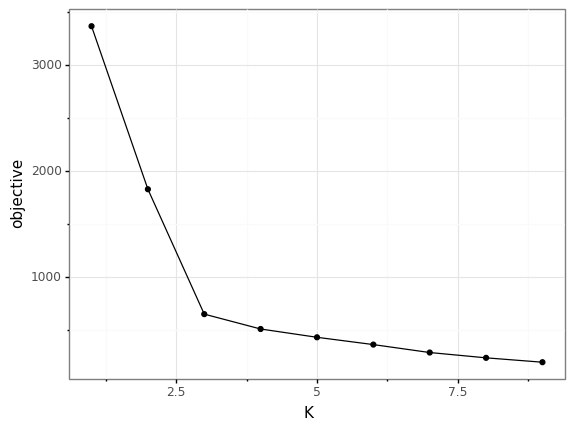

<ggplot: (-9223363293956566966)>

In [401]:
# plot the results; what K is best?
(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)

In [402]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(X)

In [403]:
# append the clusters to the data
clustered_data = noncustomer_df.join(pd.DataFrame({'cluster': kmeans.labels_}))
clustered_data

,obs,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area,cluster
1,5,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0
2,12,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1,1.0
3,17,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1,0.0
4,29,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2,0.0
5,105,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,250,1.0,0.0,0.0,1,3.0,1,5.0,1,5.0,3,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2,2.0
177,255,2.0,0.0,0.0,2,2.0,1,2.0,1,2.0,2,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1,2.0
178,258,1.0,0.0,0.0,1,1.0,1,1.0,1,1.0,1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2,1.0
179,264,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0


In [404]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])
        
sorted_attr(0, kmeans.cluster_centers_, X.columns)
# Does this give the full picture?  What's missing?

*** Sorted attributes for 0 ***
Imp healty options 5.548387096774194
Imp friendly staff 4.725806451612901
Imp ambience 4.03225806451613
Imp taste 3.612903225806451
Imp value  2.338709677419354
Imp convenient 2.338709677419354
#times/wk eat lunch/dinner out 1.4677419354838723


In [405]:
sorted_attr(1, kmeans.cluster_centers_, X.columns)
sorted_attr(2, kmeans.cluster_centers_, X.columns)

*** Sorted attributes for 1 ***
Imp taste 5.0338983050847474
Imp value  4.677966101694917
#times/wk eat lunch/dinner out 4.627118644067798
Imp convenient 4.3389830508474585
Imp ambience 2.0169491525423733
Imp friendly staff 1.9830508474576283
Imp healty options 1.3389830508474578
*** Sorted attributes for 2 ***
Imp healty options 1.7627118644067798
Imp convenient 1.6779661016949146
Imp ambience 1.5762711864406767
Imp friendly staff 1.4067796610169492
#times/wk eat lunch/dinner out 1.2881355932203402
Imp value  1.2881355932203393
Imp taste 1.118644067796612


In [406]:
pd.crosstab(clustered_data.cluster,[clustered_data.area, clustered_data.income])

area      1               2                
income  0.0 1.0 2.0 3.0 0.0 1.0 2.0 3.0 4.0
cluster                                    
0.0       0   4  18   2   0   0   0  38   0
1.0       0  41   1   0   0  11   4   1   0
2.0       2  13   6   2   1  10   3   3  19

In [407]:
pd.crosstab(clustered_data.cluster,[clustered_data.area, clustered_data.age])

area      1                   2                
age     0.0 1.0 2.0 3.0 4.0 0.0 1.0 2.0 3.0 4.0
cluster                                        
0.0       0   1  20   3   0   0   0   0  38   0
1.0       0  21  18   2   1   0   4   4   8   0
2.0       2   2   6   8   5   1   2  23   7   3

In [408]:
pd.crosstab(clustered_data.cluster,[clustered_data.area, clustered_data['hhld type']])

area        1               2            
hhld type 0.0 1.0 2.0 3.0 0.0 1.0 2.0 3.0
cluster                                  
0.0         0   3  21   0   0   0   0  38
1.0         0  40   1   1   0   3   8   5
2.0         2   7  10   4   1   7   7  21